## Note

#### From our previous analysis from baseline model file we decided to do some feature engineering. Added the following columns
- Military per capita
- Fights
- Entire army
- High GDP
- Miltiary spending


In order to find the robustness of the model we created a effective validation strategy by creating train-test split with data with year before 2021 and evaluating it on 2022. So that we expect our model would possibly generalise well for 2023 data.

#### Importing libraries:

In [92]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_rows = None

### Reading data:

In [93]:
df = pd.read_csv("iith.csv")
df.head()

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,1,Afghanistan,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,2,Afghanistan,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,3,Afghanistan,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,4,Afghanistan,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,5,Afghanistan,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2755 non-null   int64  
 1   Country                   2755 non-null   object 
 2   Year                      2755 non-null   int64  
 3   Status                    2755 non-null   object 
 4   Power Level               2745 non-null   float64
 5   Civilian Deaths           2745 non-null   float64
 6   Military Accidents        2755 non-null   int64  
 7   Substance Abuse           2738 non-null   float64
 8   Military Investment       2755 non-null   float64
 9   Air Force                 2211 non-null   float64
 10  Army                      2755 non-null   int64  
 11  Intelligence              2723 non-null   float64
 12  Navy                      2755 non-null   int64  
 13  Submarines                2736 non-null   float64
 14  Educatio

In [95]:
df=df.drop(['Unnamed: 0', 'Educational Investment', 'Substance Abuse'],axis=1)

In [96]:
df.describe()

,Year,Power Level,Civilian Deaths,Military Accidents,Military Investment,Air Force,Army,Intelligence,Navy,Submarines,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
count,2755.000000,2745.000000,2745.000000,2755.000000,2755.000000,2211.000000,2755.000000,2723.000000,2755.000000,2736.000000,2736.000000,2755.000000,2336.000000,2.144000e+03,2723.000000,2723.000000,2598.000000,2602.000000
mean,2015.021779,69.053974,165.606193,30.763339,787.129020,80.872908,2480.524138,38.023030,42.790563,82.475512,82.254386,1.808407,7502.798523,1.286305e+07,4.852435,4.908480,0.638776,11.925008
std,4.328500,9.610152,125.877696,119.776471,2043.524973,25.316113,11666.603222,19.973359,163.353254,23.521699,24.022498,5.238361,14425.541381,6.255998e+07,4.470310,4.567235,0.535577,3.409595
min,2008.000000,36.090000,-2.000000,-9.000000,-1.440000,-2.000000,-9.000000,0.820000,-10.000000,0.000000,-1.000000,-1.580000,2.460000,3.100000e+01,-1.090000,-1.380000,-1.300000,-1.000000
25%,2011.000000,62.870000,74.000000,1.000000,10.325000,77.000000,1.000000,19.075000,1.000000,78.000000,78.000000,-0.080000,453.740000,1.922085e+05,1.565000,1.560000,0.290000,10.042500
50%,2015.000000,72.010000,144.000000,4.000000,79.820000,91.000000,17.000000,43.190000,5.000000,92.000000,92.000000,0.360000,1720.520000,1.361184e+06,3.350000,3.350000,0.650000,12.245000
75%,2019.000000,75.620000,228.000000,22.500000,490.535000,96.000000,374.500000,55.895000,28.000000,97.000000,97.000000,1.135000,5845.192500,7.292424e+06,7.215000,7.230000,1.010000,14.260000
max,2022.000000,90.160000,721.000000,1797.000000,19479.680000,105.000000,212179.000000,87.570000,2501.000000,108.000000,107.000000,50.310000,119173.150000,1.293859e+09,27.620000,29.130000,2.350000,21.130000


In [97]:
df.columns

Index(['Country', 'Year', 'Status', 'Power Level', 'Civilian Deaths',
       'Military Accidents', 'Military Investment', 'Air Force', 'Army',
       'Intelligence', 'Navy', 'Submarines', 'Literacy', 'Revolts', 'GDP',
       'Population', 'Offense', 'Defense', 'Political Stability',
       'International Reputation'],
      dtype='object')

In [98]:
nf= (df.dtypes!='object')
lnf=list(nf[nf].index)
print("Numerical Features:")
print(lnf)

Numerical Features:
['Year', 'Power Level', 'Civilian Deaths', 'Military Accidents', 'Military Investment', 'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines', 'Literacy', 'Revolts', 'GDP', 'Population', 'Offense', 'Defense', 'Political Stability', 'International Reputation']


In [99]:
cf= (df.dtypes=='object')
lcf=list(cf[cf].index)
print("Categorical Features:")
print(lcf)

Categorical Features:
['Country', 'Status']


In [100]:
df2 = df[df.columns[(df.columns.isin(lcf) == False)]]
df3 = df[df.columns[(df.columns.isin(lcf) == True)]]

target = df2['Power Level']
df2 = df2.drop(['Power Level'],axis=1)
df2['Power Level']=target

res_df = pd.concat([df3,df2], axis=1)
res_df.head()

,Country,Status,Year,Civilian Deaths,Military Accidents,Military Investment,Air Force,Army,Intelligence,Navy,Submarines,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation,Power Level
0,Afghanistan,Developing,2022,271.0,62,73.83,59.0,495,18.33,83,58.0,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57,59.73
1,Afghanistan,Developing,2021,268.0,66,73.66,71.0,431,18.80,94,60.0,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40,60.50
2,Afghanistan,Developing,2020,271.0,70,77.76,65.0,2788,16.39,89,65.0,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52,60.09
3,Afghanistan,Developing,2019,279.0,70,6.95,72.0,3014,16.64,103,65.0,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82,58.88
4,Afghanistan,Developing,2018,272.0,74,79.82,70.0,1988,17.04,102,67.0,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14,59.26


In [101]:
res_df.isnull().sum()

Country                       0
Status                        0
Year                          0
Civilian Deaths              10
Military Accidents            0
Military Investment           0
Air Force                   544
Army                          0
Intelligence                 32
Navy                          0
Submarines                   19
Literacy                     19
Revolts                       0
GDP                         419
Population                  611
Offense                      32
Defense                      32
Political Stability         157
International Reputation    153
Power Level                  10
dtype: int64

In [102]:
res_df['Country'].value_counts()

Afghanistan                                             15
Peru                                                    15
Nicaragua                                               15
Niger                                                   15
Nigeria                                                 15
Norway                                                  15
Oman                                                    15
Pakistan                                                15
Panama                                                  15
Papua New Guinea                                        15
Paraguay                                                15
Philippines                                             15
Lebanon                                                 15
Poland                                                  15
Portugal                                                15
Qatar                                                   15
Republic of Korea                                       

In [103]:
#null values greater than 0
cols_with_null = res_df.columns[res_df.isnull().any()]

cols_with_gt_0_null = cols_with_null[res_df[cols_with_null].isnull().sum() > 0]

for col in cols_with_gt_0_null:
    null_count = res_df[col].isnull().sum()
    print(f"{col}: {null_count}")

Civilian Deaths: 10
Air Force: 544
Intelligence: 32
Submarines: 19
Literacy: 19
GDP: 419
Population: 611
Offense: 32
Defense: 32
Political Stability: 157
International Reputation: 153
Power Level: 10


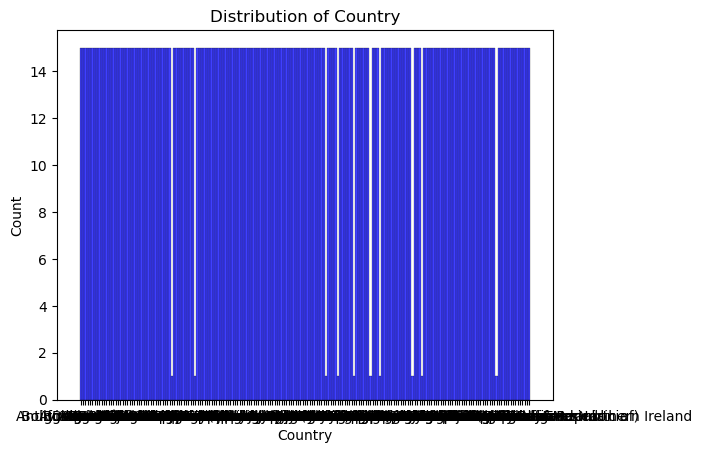

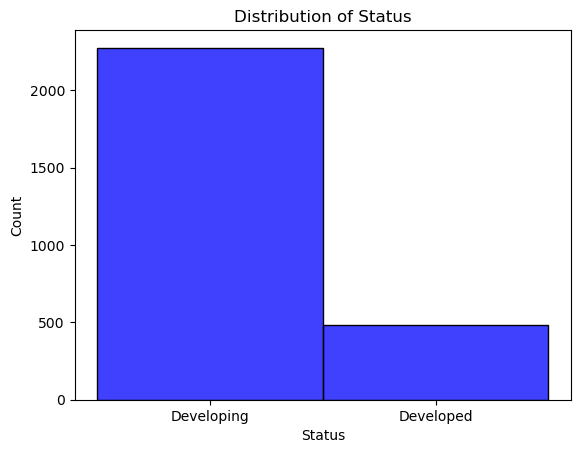

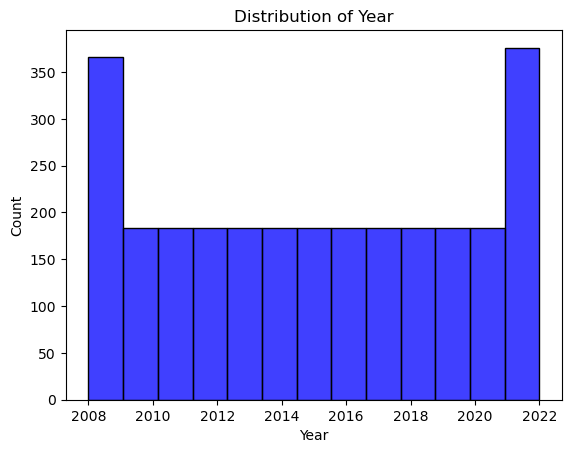

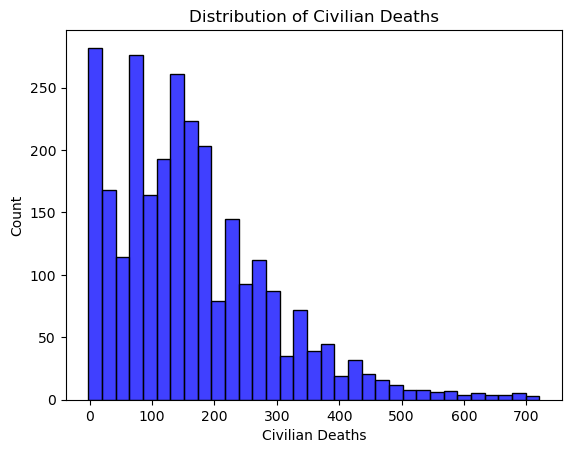

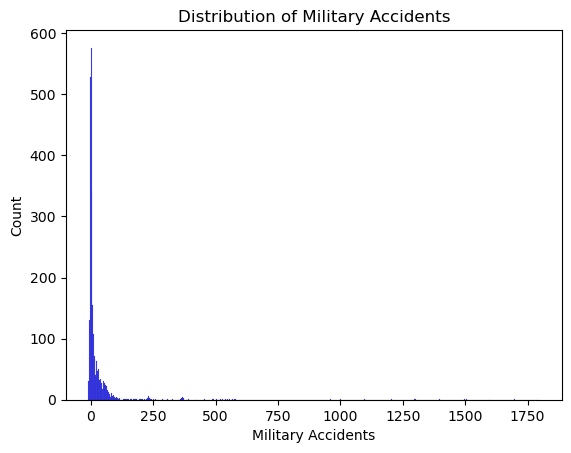

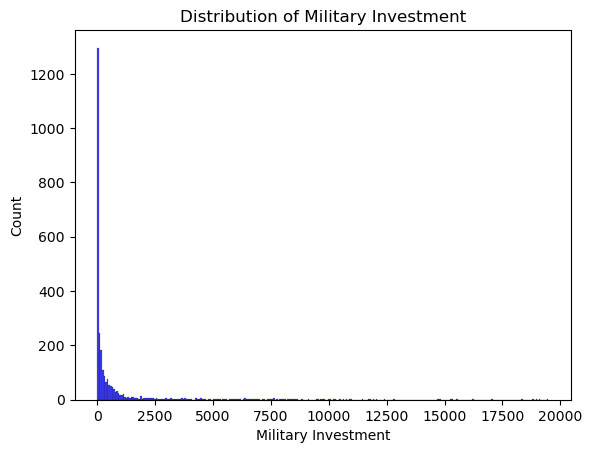

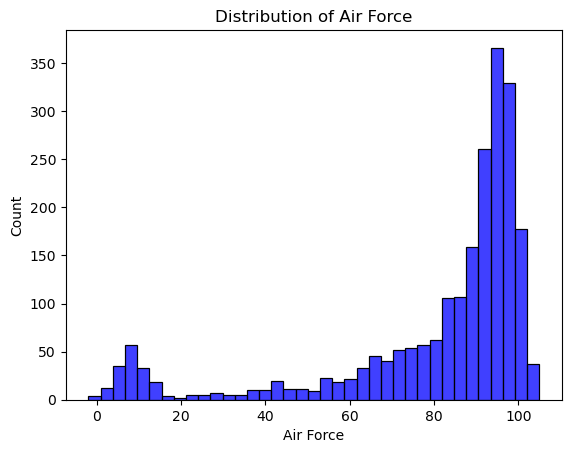

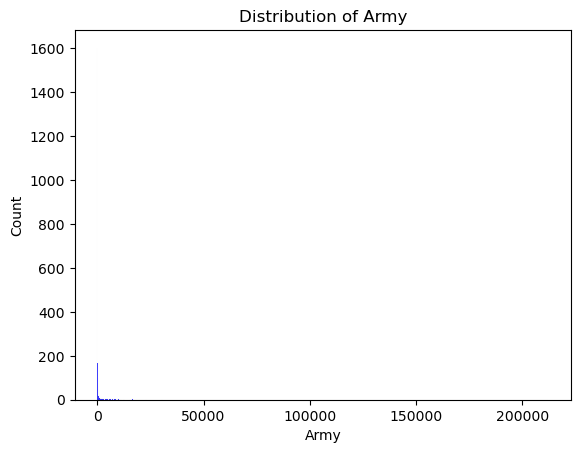

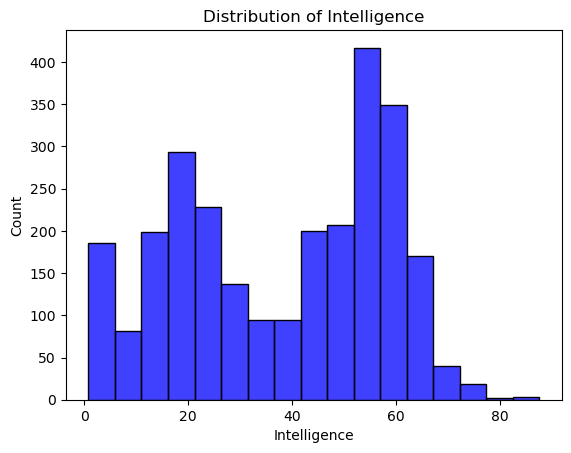

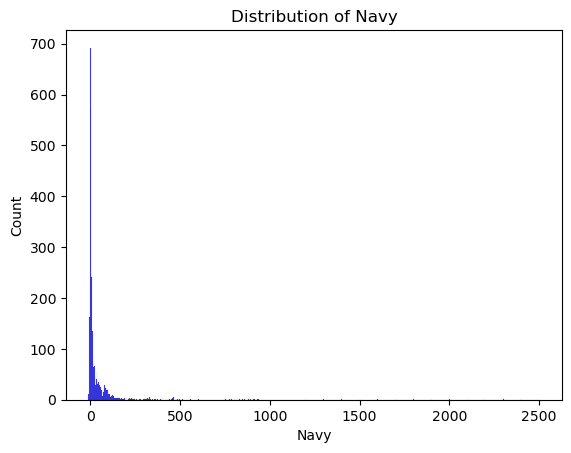

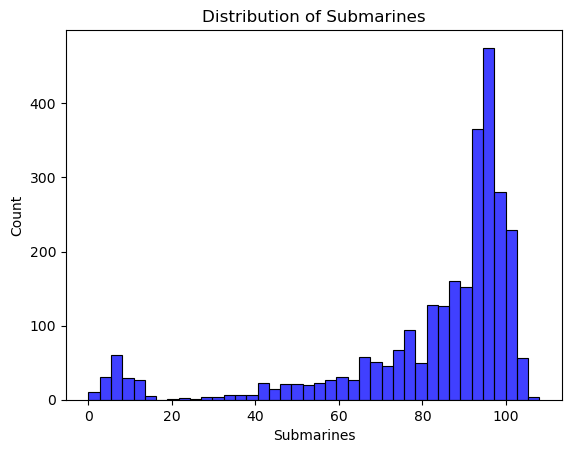

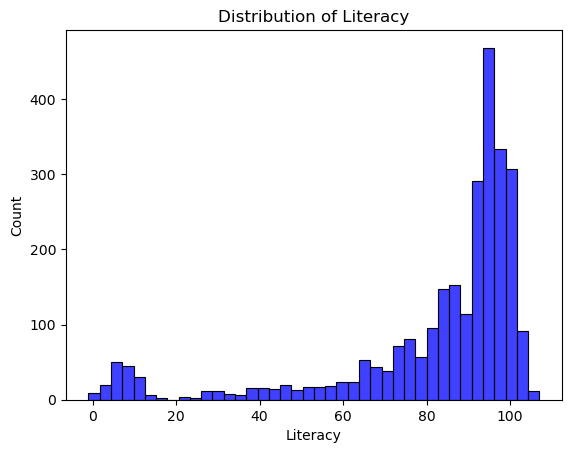

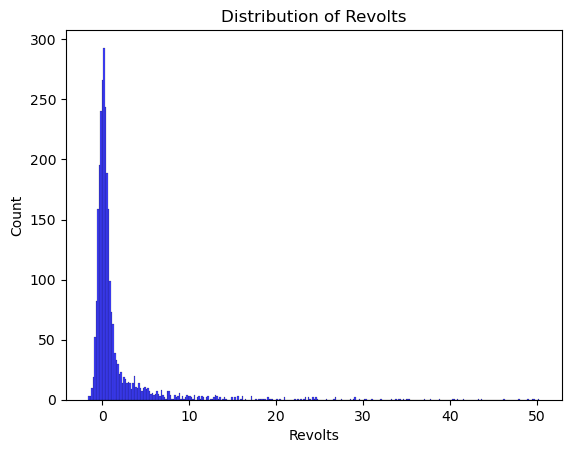

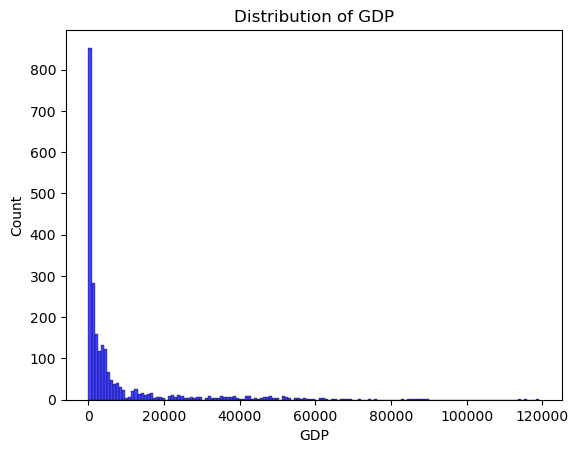

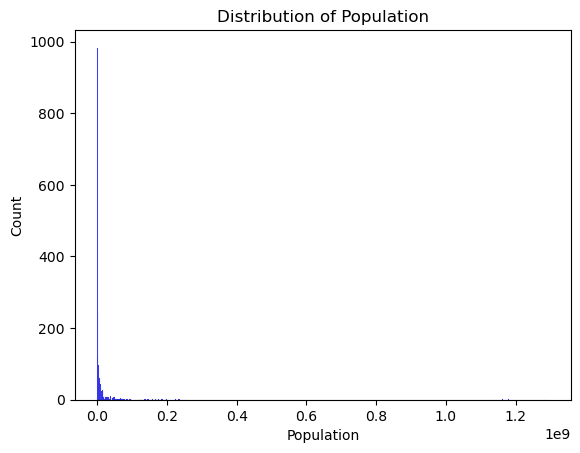

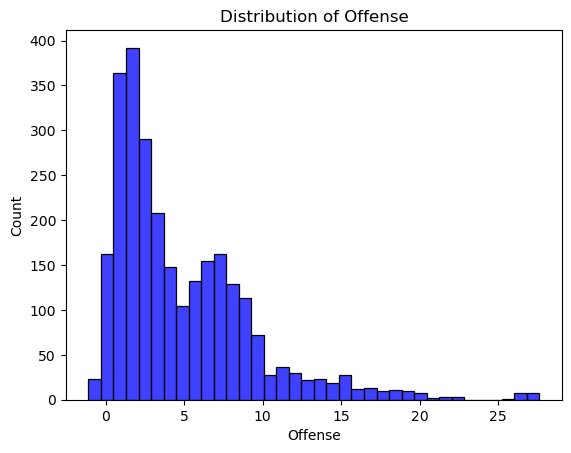

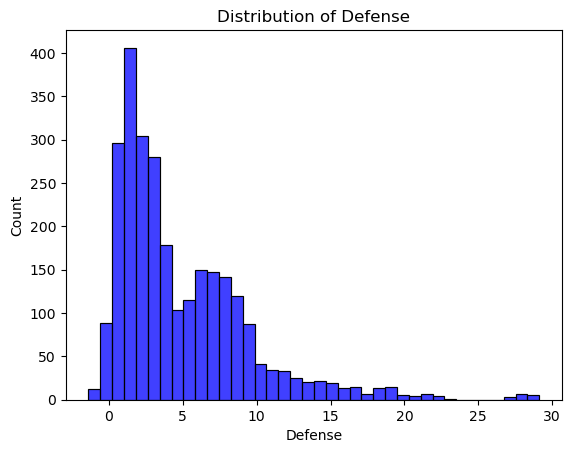

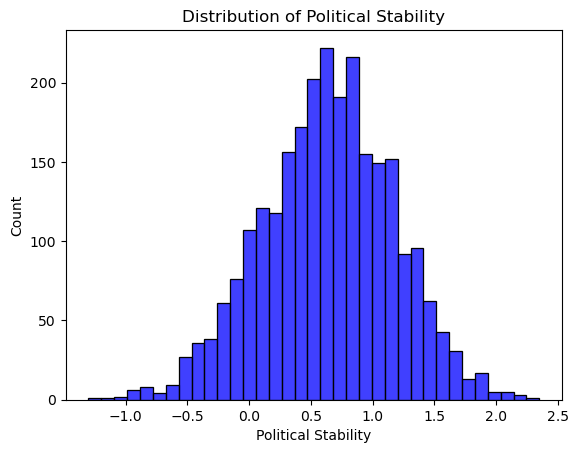

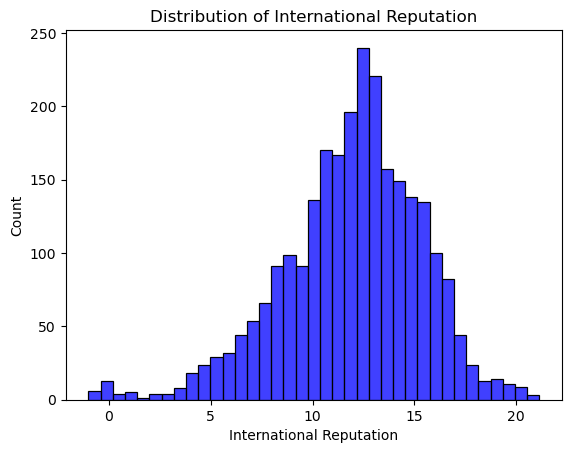

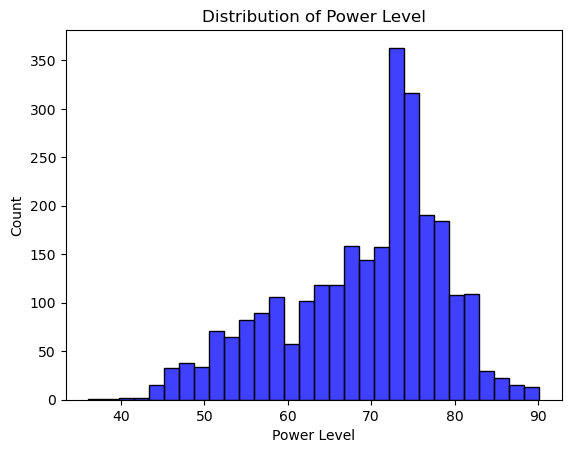

In [104]:
for col in res_df.columns:
    plt.figure()
    sns.histplot(res_df[col], kde=False, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [105]:
for col in cols_with_gt_0_null:
    if col not in ['Political Stability',]:  
        median = res_df[col].median()
        res_df[col].fillna(median, inplace=True)
    else:
        mean = res_df[col].mean()
        res_df[col].fillna(mean, inplace=True)

In [106]:
res_df.isnull().sum()

Country                     0
Status                      0
Year                        0
Civilian Deaths             0
Military Accidents          0
Military Investment         0
Air Force                   0
Army                        0
Intelligence                0
Navy                        0
Submarines                  0
Literacy                    0
Revolts                     0
GDP                         0
Population                  0
Offense                     0
Defense                     0
Political Stability         0
International Reputation    0
Power Level                 0
dtype: int64

In [107]:
military_cols = ['Military Investment', 'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines']
res_df['Military per Capita'] = res_df[military_cols].sum(axis=1) / res_df['Population']

res_df['fights'] = res_df['Civilian Deaths'] + res_df['Revolts']

In [108]:
res_df['entire army']= res_df['Army']+res_df['Air Force']+res_df['Navy']
res_df['High GDP'] = np.where(res_df['GDP'] > res_df['GDP'].quantile(0.75), 1, 0)
res_df['Military spending/GDP'] = res_df['Military Investment'] / res_df['GDP']

In [109]:
res_df.head()

,Country,Status,Year,Civilian Deaths,Military Accidents,Military Investment,Air Force,Army,Intelligence,Navy,...,Offense,Defense,Political Stability,International Reputation,Power Level,Military per Capita,fights,entire army,High GDP,Military spending/GDP
0,Afghanistan,Developing,2022,271.0,62,73.83,59.0,495,18.33,83,...,17.16,17.68,0.44,10.57,59.73,0.002403,270.79,637.0,0,0.120468
1,Afghanistan,Developing,2021,268.0,66,73.66,71.0,431,18.80,94,...,18.28,17.85,0.72,10.40,60.50,0.000024,267.96,596.0,0,0.116628
2,Afghanistan,Developing,2020,271.0,70,77.76,65.0,2788,16.39,89,...,16.85,18.46,0.99,9.52,60.09,0.000839,270.79,2942.0,0,0.116146
3,Afghanistan,Developing,2019,279.0,70,6.95,72.0,3014,16.64,103,...,17.72,18.11,0.84,9.82,58.88,0.001100,278.40,3189.0,0,0.109157
4,Afghanistan,Developing,2018,272.0,74,79.82,70.0,1988,17.04,102,...,18.91,18.76,0.52,9.14,59.26,0.000806,271.88,2160.0,0,0.144108


In [110]:
df_final = res_df.copy()
df_final.shape

(2755, 25)

In [111]:
to_remove = res_df['Country'].value_counts()[(res_df['Country'].value_counts() == 1).values].index
to_remove

Index(['Tuvalu', 'Cook Islands', 'Marshall Islands', 'Monaco', 'Palau', 'Niue',
       'San Marino', 'Nauru', 'Saint Kitts and Nevis', 'Dominica'],
      dtype='object')

In [112]:
df_final = df_final[df_final['Country'].isin(to_remove) == False]

In [113]:
countries = df_final['Country'].unique()

In [114]:
df_final['Status_encoded'] = pd.get_dummies(df_final['Status'], drop_first=True)
df_final.drop(columns=['Status'], axis=1, inplace=True)

In [115]:
new_cols = pd.get_dummies(df_final['Country'], drop_first=True)
df_with_country = df_final.copy()
df_final = pd.concat([df_final, new_cols], axis=1)
df_final.drop(['Country'], axis=1, inplace=True)

In [116]:
X = df_final.drop(['Power Level'], axis=1)
y = df_final[['Power Level']]

In [117]:
X.shape

(2745, 205)

In [118]:
import xgboost as xg
import lightgbm as lg
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [119]:
def get_base_model_predictions(models, X):
    predictions = []
    for model in models:
        predictions.append(model.predict(X))
    return np.vstack(predictions).T

In [120]:
params_lgbm={'random_state': 33,'n_estimators':5000,
 'min_data_per_group': 5,
 'boosting_type': 'gbdt',
 'num_leaves': 256,
 'max_dept': -1,
 'learning_rate': 0.02,
 'subsample_for_bin': 200000,
 'lambda_l1': 1.074622455507616e-05,
 'lambda_l2': 2.0521330798729704e-06,
 'n_jobs': -1,
 'cat_smooth': 1.0,
 'silent': True,
 'importance_type': 'split',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'bagging_fraction': 0.8206341150202605,
 'min_data_in_leaf': 100,
 'min_sum_hessian_in_leaf': 0.001,
 'bagging_freq': 6,
 'feature_fraction': 0.5,
 'min_gain_to_split': 0.0,
 'min_child_samples': 20}

In [121]:
models = [xg.XGBRegressor(), lg.LGBMRegressor(**params_lgbm, njobs=-1), RandomForestRegressor()]

In [122]:
for model in models:
    model.fit(X, y)

[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l2 is set=2.0521330798729704e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0521330798729704e-06
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8206341150202605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206341150202605
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_l

In [131]:
test = pd.read_csv('Test_Dataset.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   183 non-null    object 
 1   Year                      183 non-null    int64  
 2   Status                    183 non-null    object 
 3   Civilian Deaths           183 non-null    int64  
 4   Military Accidents        183 non-null    int64  
 5   Military Investment       183 non-null    float64
 6   Air Force                 174 non-null    float64
 7   Army                      183 non-null    int64  
 8   Intelligence              181 non-null    float64
 9   Navy                      183 non-null    int64  
 10  Submarines                183 non-null    int64  
 11  Literacy                  183 non-null    int64  
 12  Revolts                   183 non-null    float64
 13  GDP                       154 non-null    float64
 14  Population

In [132]:
# test_2 = X[X['Year']==2021]
# test_2.shape

In [133]:
def processing_and_storing(models, test):
#     test['Substance Abuse'] = res_df['Substance Abuse'].mean()
#     test['Educational Investment'] = res_df['Educational Investment'].mean()
    
    ## We are removing these columns even if they are present in the unseen test data.
    if 'Substance Abuse' in test:
        test.drop(['Substance Abuse'], axis=1, inplace=True)
    if 'Educational Investment' in test:
        test.drop(['Educational Investment'], axis=1, inplace=True)
        
    for col in cols_with_gt_0_null[:-1]:
        if col not in ['Political Stability']:  
            median = res_df[col].median()
            test[col].fillna(median, inplace=True)
        else:
            mean = res_df[col].mean()
            test[col].fillna(mean, inplace=True)     
    
    ## Feature Engineering
    military_cols = ['Military Investment', 'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines']
    test['Military per Capita'] = test[military_cols].sum(axis=1) / test['Population']

    test['fights'] = test['Civilian Deaths'] + test['Revolts']
    
    test['entire army']= test['Army']+test['Air Force']+test['Navy']
    test['High GDP'] = np.where(test['GDP'] > test['GDP'].quantile(0.75), 1, 0)
    test['Military spending/GDP'] = test['Military Investment'] / test['GDP']
    
    test['Status_encoded'] = pd.get_dummies(test['Status'], drop_first=True)
    test.drop(columns=['Status'], axis=1, inplace=True)
    
    new_cols = pd.get_dummies(test['Country'], drop_first=True)
    test = pd.concat([test, new_cols], axis=1)
    test.drop(['Country'], axis=1, inplace=True)
    
#     prediction = model.predict(test.values)       
    prediction = get_base_model_predictions(models, test.values)
    
    print(prediction)
    df = pd.DataFrame()
    l = LabelEncoder()
    df['country ID'] = l.fit_transform(countries)
    df['predicted power level'] = np.mean(prediction, axis=1)
    df.to_csv('Final-predictions.csv', index=False)

In [134]:
processing_and_storing(models, test)

[[59.45107651 60.28137513 60.2951    ]
 [81.14421082 81.00760502 79.383     ]
 [73.70855713 72.6724756  73.8605    ]
 [50.83544159 55.45052161 52.8325    ]
 [75.55195618 75.28243991 75.0521    ]
 [77.04656219 77.94034487 76.4854    ]
 [74.66809082 75.83783574 74.8751    ]
 [81.88249969 80.45029067 81.4993    ]
 [84.00510406 82.50875083 81.2595    ]
 [74.66397095 75.65860494 74.0711    ]
 [73.43106842 73.69577419 74.0825    ]
 [79.75811005 77.83997574 76.1302    ]
 [73.57209778 73.04984284 73.8485    ]
 [76.44478607 75.19742139 74.9588    ]
 [73.8924942  73.1676996  71.7419    ]
 [84.08306122 84.71103779 84.2025    ]
 [73.03543854 73.09097979 72.4071    ]
 [60.44715881 60.77847014 62.0862    ]
 [70.35700989 70.60057132 67.838     ]
 [72.14383698 71.39224453 72.032     ]
 [76.98445892 77.2301796  75.8382    ]
 [68.49711609 66.1487077  65.9592    ]
 [74.55876923 74.79521083 74.2599    ]
 [78.03314209 77.12711409 75.6221    ]
 [73.95526123 73.51166997 74.6612    ]
 [60.28195572 62.59845474